<a href="https://colab.research.google.com/github/shreyas-sreedhar/ipl-data-analysis/blob/main/DSETM_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO6105 - ASSIGNMENT_3**
**

*` - Shreyas S Sreedhar 002874944`*

Dataset Link - https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020


CSV - IPL Ball-by-Ball 2008-2020.csv CSV 2 - IPL Matches 2008-2020.csv

### IPL Ball-by-Ball 2008-2020 Ball_by_Ball Dataset

The dataset contains detailed information about each ball bowled in IPL matches during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match.
- **inning**: The inning number (1 or 2).
- **over**: The over number in the inning.
- **ball**: The ball number within the over.
- **batsman**: The name of the batsman on strike.
- **non_striker**: The name of the non-striker batsman.
- **bowler**: The name of the bowler.
- **batsman_runs**: The number of runs scored by the batsman off the ball.
- **extra_runs**: The number of extra runs conceded (like wides, no balls).
- **total_runs**: Total runs scored off the ball (batsman_runs + extra_runs).
- **non_boundary**: Indicator if the runs were scored without a boundary.
- **is_wicket**: Indicator if a wicket was taken on the ball.
- **dismissal_kind**: The type of dismissal, if applicable.
- **player_dismissed**: The name of the dismissed player, if applicable.
- **fielder**: The name of the fielder involved in the dismissal, if applicable.
- **extras_type**: The type of extra run conceded, if applicable.
- **batting_team**: The name of the batting team.
- **bowling_team**: The name of the bowling team.

Using this dataset for various data analysis and exploration tasks related to IPL matches till 2020


### IPL Matches 2008-2020 Matches Dataset

The dataset contains information about IPL matches played during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match, same as in the ball-by-ball dataset.
- **city**: City where the match was played.
- **date**: Date of the match.
- **player_of_match**: Player who was awarded the 'Player of the Match'.
- **venue**: Venue where the match was played.
- **neutral_venue**: Indicator if the venue was neutral.
- **team1** and **team2**: Teams playing the match.
- **toss_winner**: Team that won the toss.
- **toss_decision**: Decision made by the toss winner to bat or field.
- **winner**: Winning team of the match.
- **result**: Type of result (e.g., runs, wickets).
- **result_margin**: Margin of the win.
- **eliminator**: Indicator if the match was an eliminator.
- **method**: Any special method applied (like D/L method).
- **umpire1** and **umpire2**: Names of the umpires.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.pipeline import Pipeline

In [2]:
ipl_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv"
)
ipl_matches_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Matches%202008-2020.csv"
)



### IPL Ball-by-Ball 2008-2020 Ball_by_Ball Dataset

The dataset contains detailed information about each ball bowled in IPL matches during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match.
- **inning**: The inning number (1 or 2).
- **over**: The over number in the inning.
- **ball**: The ball number within the over.
- **batsman**: The name of the batsman on strike.
- **non_striker**: The name of the non-striker batsman.
- **bowler**: The name of the bowler.
- **batsman_runs**: The number of runs scored by the batsman off the ball.
- **extra_runs**: The number of extra runs conceded (like wides, no balls).
- **total_runs**: Total runs scored off the ball (batsman_runs + extra_runs).
- **non_boundary**: Indicator if the runs were scored without a boundary.
- **is_wicket**: Indicator if a wicket was taken on the ball.
- **dismissal_kind**: The type of dismissal, if applicable.
- **player_dismissed**: The name of the dismissed player, if applicable.
- **fielder**: The name of the fielder involved in the dismissal, if applicable.
- **extras_type**: The type of extra run conceded, if applicable.
- **batting_team**: The name of the batting team.
- **bowling_team**: The name of the bowling team.

Using this dataset for various data analysis and exploration tasks related to IPL matches till 2020


### IPL Matches 2008-2020 Matches Dataset

The dataset contains information about IPL matches played during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match, same as in the ball-by-ball dataset.
- **city**: City where the match was played.
- **date**: Date of the match.
- **player_of_match**: Player who was awarded the 'Player of the Match'.
- **venue**: Venue where the match was played.
- **neutral_venue**: Indicator if the venue was neutral.
- **team1** and **team2**: Teams playing the match.
- **toss_winner**: Team that won the toss.
- **toss_decision**: Decision made by the toss winner to bat or field.
- **winner**: Winning team of the match.
- **result**: Type of result (e.g., runs, wickets).
- **result_margin**: Margin of the win.
- **eliminator**: Indicator if the match was an eliminator.
- **method**: Any special method applied (like D/L method).
- **umpire1** and **umpire2**: Names of the umpires.




In [3]:
# Viewing data in the file
ipl_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
# Viewing the matches data in the file
ipl_matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
ipl_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

**1. Fit a linear model and interpret the regression coefficients**

In [8]:
from sklearn.linear_model import LinearRegression


# Create a linear regression model
model_lr = LinearRegression()
feature_columns = [ 'over','ball','extra_runs', 'batsman_runs','is_wicket']

# Fit the model to the data
model_lr.fit(ipl_data[['total_runs']], ipl_data[feature_columns])

# Print the regression coefficient
print(model_lr.coef_)

# Interpret the regression coefficient
print("For every one unit increase in result margin, the predicted winner probability increases by", model_lr.coef_[0])

[[ 0.31013383]
 [ 0.00756492]
 [ 0.01503621]
 [ 0.98496379]
 [-0.02433724]]
For every one unit increase in result margin, the predicted winner probability increases by [0.31013383]


**2. Fit a tree-based model and interpret the nodes**

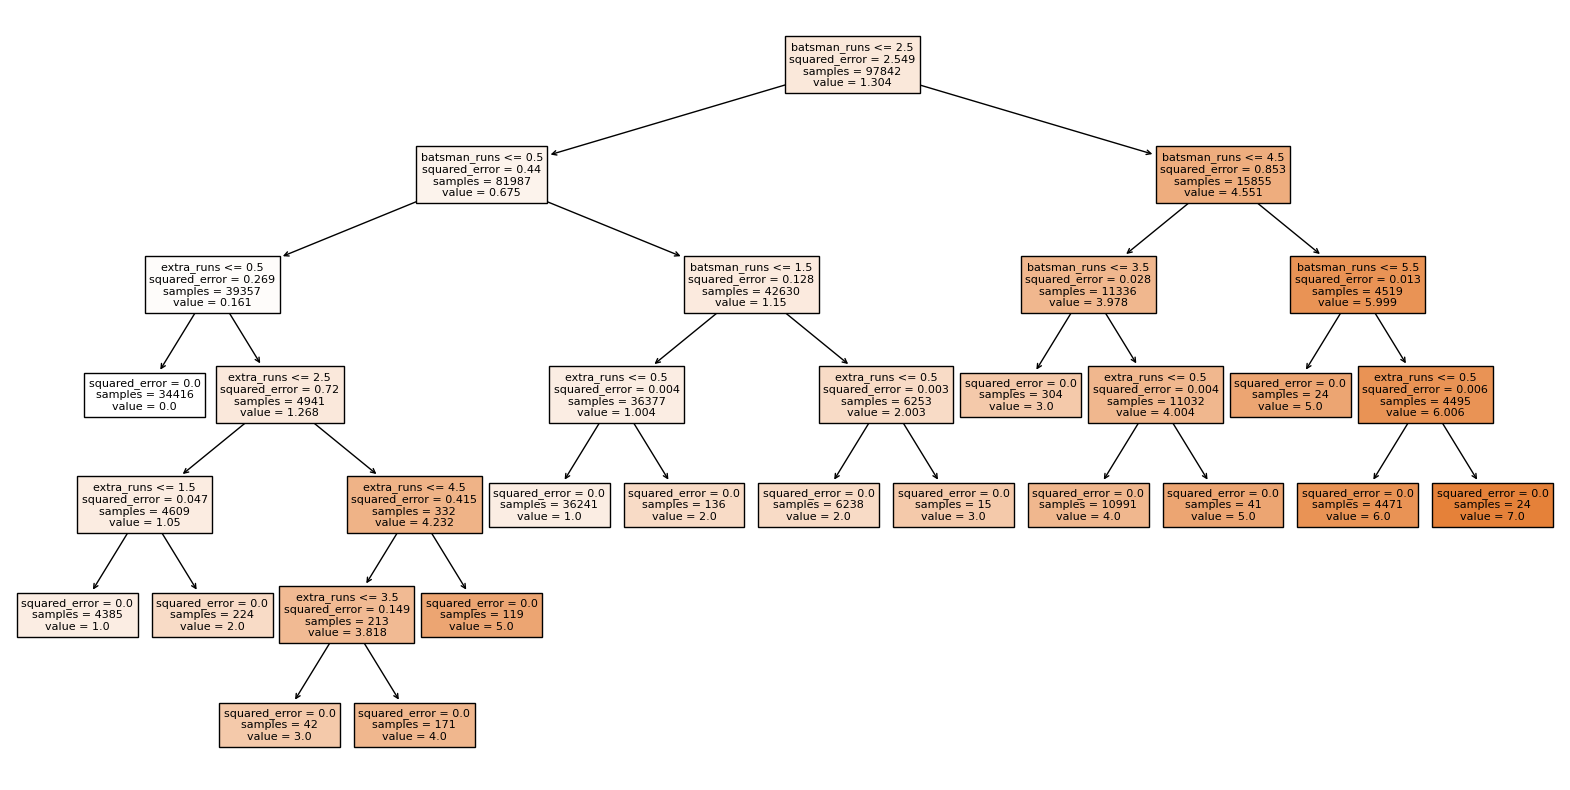

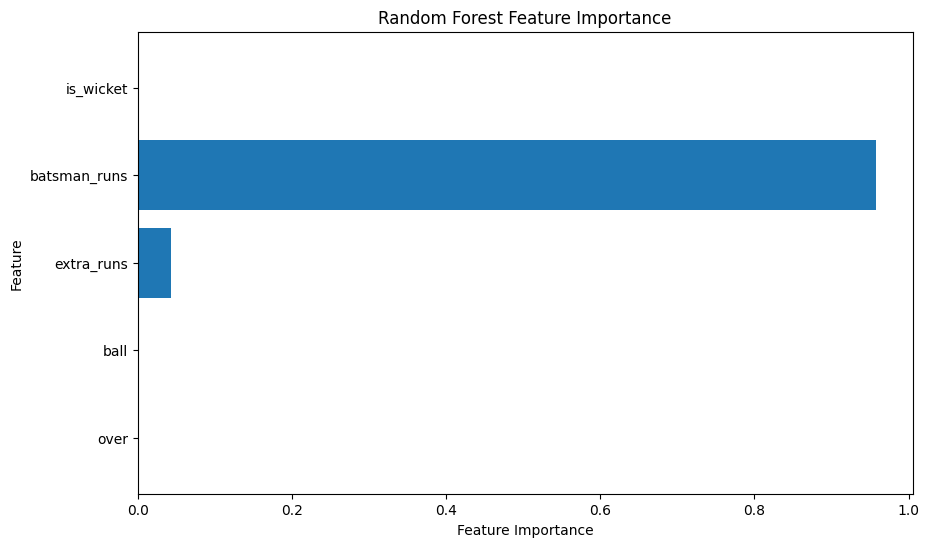

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

feature_columns = [ 'over','ball','extra_runs', 'batsman_runs','is_wicket']
X = ipl_data[feature_columns]
y = ipl_data['total_runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(forest_model.estimators_[0], filled=True, feature_names=feature_columns)
plt.show()

# Visualize feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_columns, forest_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

**2. Use auto ml to find the best model**

In [11]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

In [12]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
6
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

2
Checking whether there is an H2O instance running at http://localhost:49402..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6met70lp
  JVM stdout: /tmp/tmp6met70lp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6met70lp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:49402
Connecting to H2O server at http://127.0.0.1:49402 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_kc3ky7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [38]:
df = h2o.import_file(path='https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [39]:
df.describe(chunk_summary=True)

Rows:193468
Cols:18

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              1        0.694445            80  B     0.00196733
CXI           Sparse Integers            39       27.0833             138.5 KB  3.48783
C1N           1-Byte Integers (w/o NAs)  56       38.8889             1.3 MB    33.3974
C2            2-Byte Integers            40       27.7778             1.8 MB    47.6438
C2S           2-Byte Fractions           3        2.08333             142.3 KB  3.5825
C4            4-Byte Integers            5        3.47222             472.0 KB  11.8865

Frame distribution summary: 
                 size    number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  ------  ----------------  -----------------------------  ------------------
127.0.0.1:49402  3.9 MB  193468            8                              144
mean             3.9 MB  193468            8                              144
min              3.9 MB  193468            8                              144
max              3.9 MB  193468            8                              144
stddev           0  B    0                 0                              0
total            3.9 MB  193468            8                              144

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
type,int,int,int,int,enum,enum,enum,int,int,int,int,int,enum,enum,enum,enum,enum,enum
mins,335982.0,1.0,0.0,1.0,,,,0.0,0.0,0.0,0.0,0.0,,,,,,
mean,756768.8084386048,1.482131411913079,9.177026691752655,3.6159674985010457,,,,1.240230942584821,0.06641408398288089,1.3066450265677005,8.270101515496103e-05,0.049077883681022186,,,,,,
maxs,1237181.0,2.0,19.0,9.0,,,,6.0,7.0,7.0,1.0,1.0,,,,,,
sigma,306097.0914176313,0.4996819029337365,5.67684789466175,1.8071276073795628,,,,1.610866552047968,0.3399913362666675,1.5988017649331967,0.009093657302209603,0.216031215893172,,,,,,
zeros,0,0,10254,0,,,,77637,183235,67841,193452,183973,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,335982.0,1.0,6.0,5.0,RT Ponting,BB McCullum,AA Noffke,1.0,0.0,1.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982.0,1.0,6.0,6.0,BB McCullum,RT Ponting,AA Noffke,1.0,0.0,1.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982.0,1.0,7.0,1.0,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [40]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [41]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [42]:
df.types

{'id': 'int',
 'inning': 'int',
 'over': 'int',
 'ball': 'int',
 'batsman': 'enum',
 'non_striker': 'enum',
 'bowler': 'enum',
 'batsman_runs': 'int',
 'extra_runs': 'int',
 'total_runs': 'int',
 'non_boundary': 'int',
 'is_wicket': 'int',
 'dismissal_kind': 'enum',
 'player_dismissed': 'enum',
 'fielder': 'enum',
 'extras_type': 'enum',
 'batting_team': 'enum',
 'bowling_team': 'enum'}

In [43]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [44]:
print(df_train.shape)
print(df_test.shape)

(154922, 18)
(38546, 18)


In [45]:
X=df.columns
print(X)

['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [46]:
predictors = X
response = 'total_runs'

In [47]:
#Seperate Dependent variable from Independent variable
y_numeric ='total_runs'
X.remove(y_numeric)
print(X)

['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [48]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=100, seed=1)

In [49]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20240318_12444


GLM Model: summary
    family    link      regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 1.557E-4 )  nlambda = 30, lambda.max = 155.74, lambda.min = 1.557E-4, lambda.1se = -1.0  2929                          2640                           30                      AutoML_2_20240318_12444_training_py_14_sid_8477

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.266629777910058e-07
RMSE: 0.0003558974259404046
MAE: 0.00022349000667349256
RMSLE: 0.0001500561352098295
Mean Residual Deviance: 1.266629777910058e-07
R^2: 0.9999999501109346
Null degrees of freedom: 108374
Residual degrees of freedom: 105734
Null deviance: 275152.4825467397
Residual deviance: 0.013727100218100254
AIC: -1408344.2114966358

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1.361403731640033e-07
RMSE: 0.000368972049299135
MAE: 0.00023123250963733144
RMSLE: 0.00015482548869583937
Mean Residual Deviance: 1.361403731640033e-07
R^2: 0.99999994720445
Null degrees of freedom: 15382
Residual degrees of freedom: 12742
Null deviance: 39669.99214748676
Residual deviance: 0.0020942473603818624
AIC: -194259.6958884961

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train          deviance_test           alpha    iterations    training_rmse          training_deviance      training_mae            training_r2         validation_rmse       validation_deviance    validation_mae          validation_r2
---  -------------------  ----------  -----------  --------  ------------  ----------------------  ----------------------  -------  ------------  ---------------------  ---------------------  ----------------------  ------------------  --------------------  ---------------------  ----------------------  ----------------
     2024-03-18 01:25:15  0.000 sec   1            .16E3     2641          2.5064451103435386      2.54583729996305        0.0
     2024-03-18 01:25:15  0.493 sec   2            .97E2     2641          2.486970240038194       2.526041327879373       0.0
     2024-03-18 01:25:15  0.618 sec   3            .6E2      2641          2.4561071850143485      2.4946697767892196      0.0
     2024-03-18 01:25:16  0.808 sec   4            .37E2     2641          2.4076670493650787      2.4454334941684577      0.0
     2024-03-18 01:25:16  1.016 sec   5            .23E2     2641          2.332831710278471       2.3693710581713803      0.0      5             0.0003558974259404046  1.266629777910058e-07  0.00022349000667349256  0.9999999501109346  0.000368972049299135  1.361403731640033e-07  0.00023123250963733144  0.99999994720445
     2024-03-18 01:25:16  1.152 sec   6            .14E2     2641          2.219809488011326       2.254503730381187       0.0
     2024-03-18 01:25:16  1.348 sec   7            .89E1     2641          2.055151981807594       2.0871746088470853      0.0
     2024-03-18 01:25:16  1.541 sec   8            .55E1     2641          1.827612637443804       1.8559748923241008      0.0
     2024-03-18 01:25:17  1.748 sec   9            .34E1     2641          1.535880323299302       1.5596028007243876      0.0
     2024-03-18 01:25:17  1.932 sec   10           .21E1     2641          1.1975241441206943      1.215934585919254       0.0
---  ---                  ---         ---          ---       ---           ---                     ---                     ---      ---           

In [50]:
print(aml.leaderboard)

model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance
GLM_1_AutoML_2_20240318_12444                           0.000368972  1.3614e-07   0.000231233  0.000154825               1.3614e-07
StackedEnsemble_BestOfFamily_1_AutoML_2_20240318_12444  0.000425131  1.80736e-07  0.000279055  0.000183988               1.80736e-07
StackedEnsemble_BestOfFamily_2_AutoML_2_20240318_12444  0.00862426   7.43778e-05  0.00360586   0.00394953                7.43778e-05
XGBoost_1_AutoML_2_20240318_12444                       0.0194743    0.00037925   0.00531008   0.00901353                0.00037925
XGBoost_2_AutoML_2_20240318_12444                       0.0706904    0.00499713   0.044498     0.0228376                 0.00499713
GBM_1_AutoML_2_20240318_12444                           0.0874284    0.00764373   0.0520945    0.0439675                 0.00764373
DRF_1_AutoML_2_20240318_12444                           0.0971829    0.00

**4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**

In [51]:
!pip install shap
import shap

In [62]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


100%|===================| 38649/38694 [00:46<00:00]       

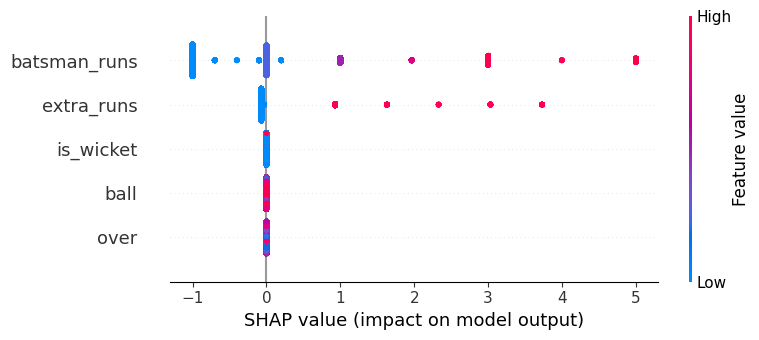

In [65]:
shap.summary_plot(shap_values, X_test)

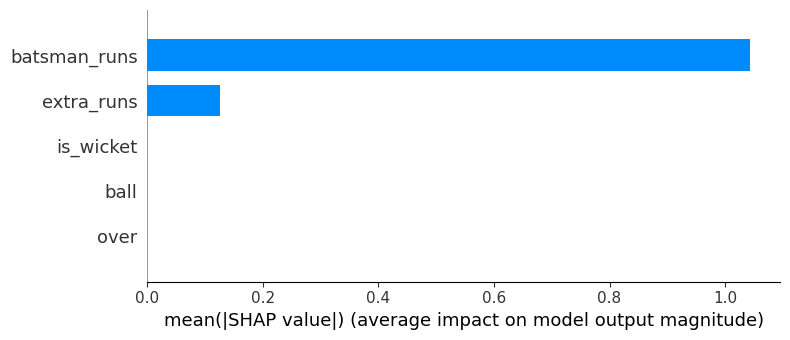

In [66]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define the preprocessing for numerical features
feature_columns = [ 'over','ball','extra_runs','is_wicket']
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Since all features have been treated as numerical due to encoding, apply the numerical pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, feature_columns)
])

# Create the modeling pipeline including preprocessing and the regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['over', 'ball', 'extra_runs',
                                                   'is_wicket'])])),
                ('regressor', LinearRegression())])

In [80]:
nan_frame = pd.DataFrame(columns=feature_columns, index=[0])

nan_frame

,over,ball,extra_runs,is_wicket
0,NaN,NaN,NaN,NaN


In [81]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 1.305


In [82]:
X_test.iloc[0: 1]


,over,ball,extra_runs,batsman_runs,is_wicket
166767,7,4,0,1,0


In [83]:
sample_prediction = round(pipeline.predict(X_test.iloc[0:1])[0], 3)

actual_value = y_test.iloc[0]

# Print the prediction and the actual value
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

Current Prediction: 1.295, Actual value: 1


In [84]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 38695it [06:17, 100.47it/s]                           


In [85]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

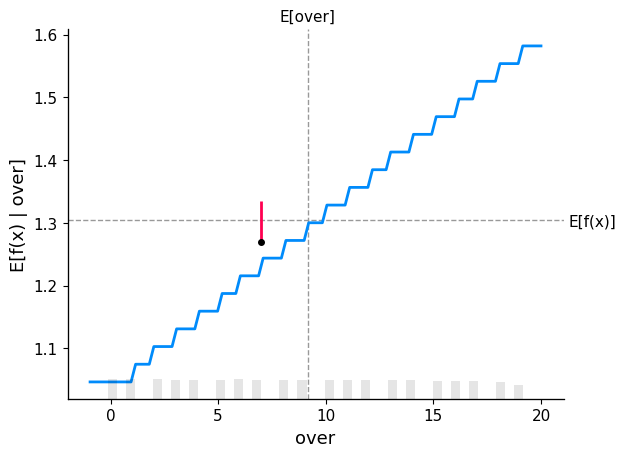

In [90]:
partial_dependence_plot('over', 0)

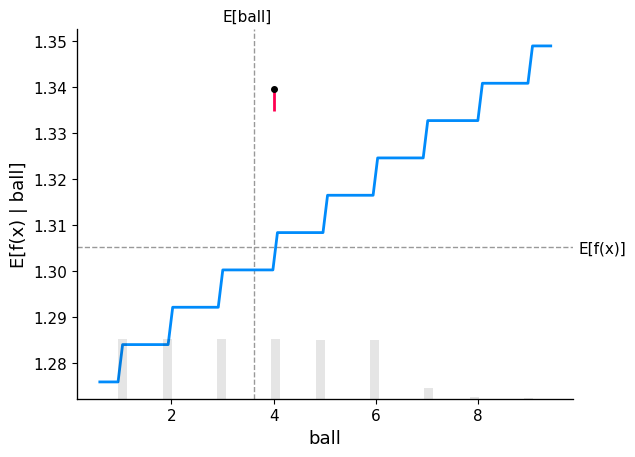

In [91]:
partial_dependence_plot('ball', 0)

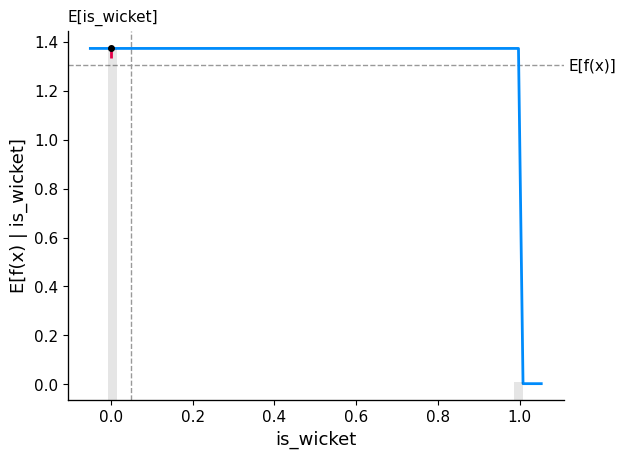

In [93]:
partial_dependence_plot('is_wicket', 0)

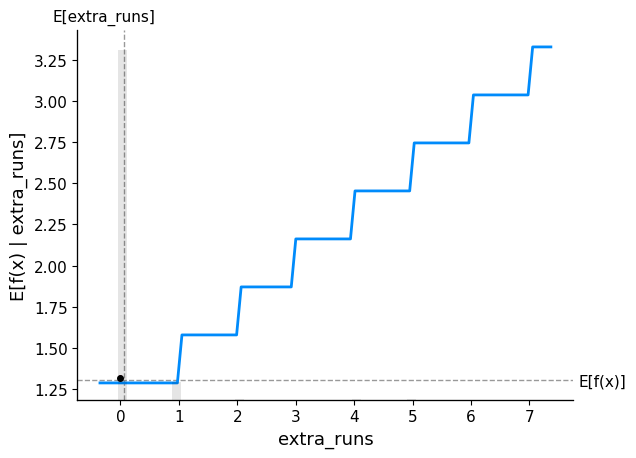

In [94]:
partial_dependence_plot('extra_runs', 0)

Since the dataset involves actual IPL runs and data, the inference from PDP is jusitifyable.

Example - Extra Runs graph shows us that as the number of extra runs increases the expected value also increase in a non linear format and such is the data in a cricket format.

In [97]:
shap.initjs()

In [98]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

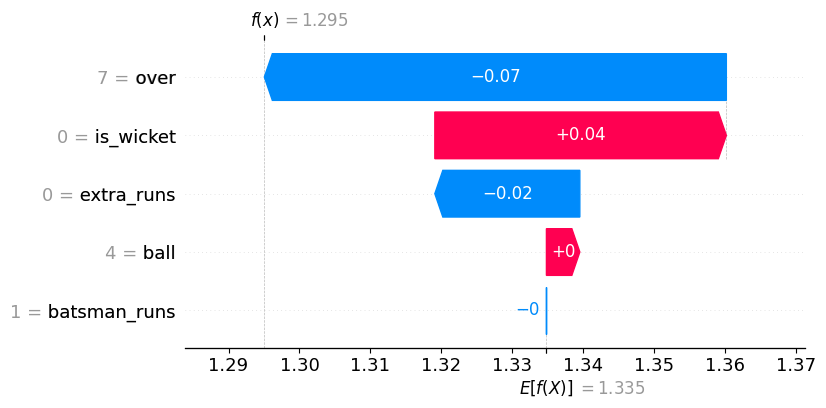

In [99]:
sample_feature_importance(0, 'waterfall')

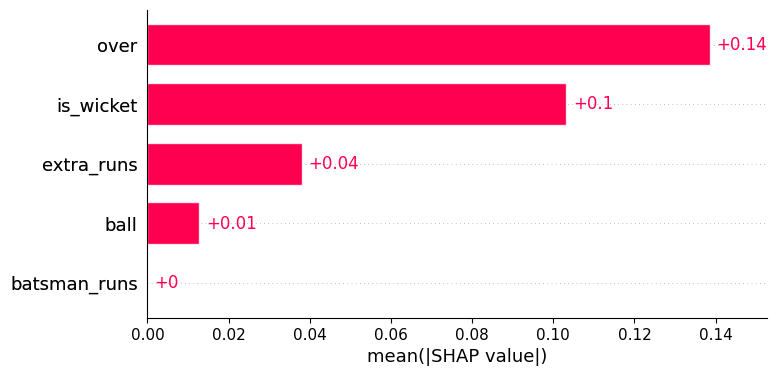

In [103]:
shap.plots.bar(shap_values)

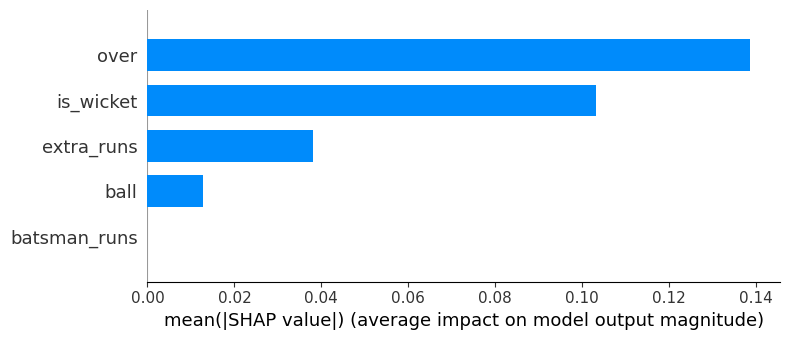

In [104]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

# **License**
MIT License

Copyright (c) 2024 Shreyas Sreedhar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References:**
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/
all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - www.openai.com/chatgpt

Professor's AutoML Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynbLinks to an external site.